In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The two way to solve (implicite and Crank-Nicolson scheme) seem to work the same. In my case, Crank-Nicolson is unstable at Fo=1 and 5, and seems to become unstable faster than the implicite solution (around Fo=9).


In [223]:
from scipy.linalg import solve_banded
from scipy.special import erf

#create temperature array
ntimes = 1000000 # nombre de pas de temps
nx = 100 # nombre de nodes
Fo = 2  # nombre de Fourrier
T = zeros([ntimes,nx]) # creates a matrix de zero
T[0,:] = 1. # first ligne 
T_top = 0. # boundaries
T_bottom = 1. # boundaries

# Crank-Nicolson scheme

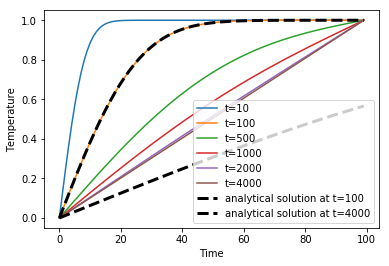

In [224]:
### Crank-Nicolson scheme
##create matrix A, banded matrix
# (-2 is because we don't want to make the calculation on the boundaries)
    # first line
A_upper = (-Fo/2)*ones(nx-2) # vector of 3 values the same
A_upper[0] = 0. # transform the first value in 0
    # second line
A_mid = (1.+Fo)*ones(nx-2) # vector of 3 values the same
    # third line
A_lower = (-Fo/2)*ones(nx-2) # vector of 3 values the same
A_lower[-1] = 0. # transform the last value in 0
    # creation of the matrice with the 3 vectores
A = vstack((A_upper,A_mid,A_lower))

## Writing the 3 equations
##########################
for n in arange(ntimes-1):
    b = array(T[n,1:-1]) + (Fo/2)*array(T[n,2:]) - Fo*array(T[n,1:-1]) + (Fo/2)*array(T[n,:-2])
    temp = array(T[n,1:-1]) # to just have the internal nodes
    b[0] = temp[0] + (Fo/2)*temp[1] - (Fo)*temp[0]+ (Fo/2)*T_top + (Fo/2)*T_top # += is like b[0]=b[0]+...
    b[-1] = temp[-1] + (Fo/2)*T_bottom - (Fo)*temp[-1] + (Fo/2)*temp[-2] + (Fo/2)*T_bottom    
    T[n+1,1:-1] = solve_banded((1,1),A,b) # how many upperband, how many lowerband, A, b
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom

#figure
figure()
for n in [10,100,500,1000,2000,4000]:
    plot(T[n,:])
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*100)))), '--k',lw=3)
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*4000)))), '--k',lw=3)
ylabel('Temperature')
xlabel('Time')
legend(['t=10','t=100','t=500','t=1000','t=2000','t=4000','analytical solution at t=100','analytical solution at t=4000'])

# Implicit solution

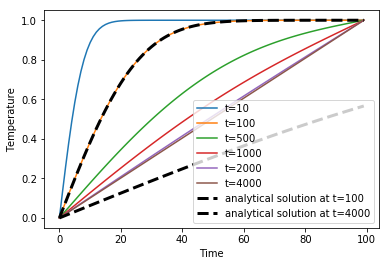

In [225]:
#Implicit solution

A_upper = -Fo*ones(nx-2)
A_mid = (1.+2.*Fo)*ones(nx-2)
A_lower = -Fo*ones(nx-2)
A_upper[0] = 0.
A_lower[-1] = 0.
A = vstack((A_upper, A_mid, A_lower))

for n in arange(ntimes-1):
    b = array(T[n,1:-1])
    b[0] += Fo*T_top
    b[-1] += Fo*T_bottom
    T[n+1,1:-1] = solve_banded((1,1), A, b)
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
    
    
#figure
figure()
for n in [10,100,500,1000,2000,4000]:
    plot(T[n,:])
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*100)))), '--k',lw=3)
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*4000)))), '--k',lw=3)
ylabel('Temperature')
xlabel('Time')
legend(['t=10','t=100','t=500','t=1000','t=2000','t=4000','analytical solution at t=100','analytical solution at t=4000'])

# Crank-Nicolson scheme, new tentative to write the code

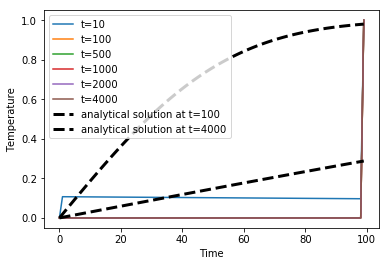

In [186]:
### Crank-Nicolson scheme, new tentative to write the code
##create matrix A, banded matrix
# (-2 is because we don't want to make the calculation on the boundaries)
    # first line
A_upper = (-Fo/2)*ones(nx-2) # vector of 3 values the same
A_upper[0] = 0. # transform the first value in 0
    # second line
A_mid = (1.+Fo)*ones(nx-2) # vector of 3 values the same
    # third line
A_lower = (-Fo/2)*ones(nx-2) # vector of 3 values the same
A_lower[-1] = 0. # transform the last value in 0
    # creation of the matrice with the 3 vectores
A = vstack((A_upper,A_mid,A_lower))

## Writing the 3 equations
##########################
for n in arange(ntimes-1):
    b = (1-Fo)*array(T[n,1:-1]) + (Fo/2)*( array(T[n,:-2]) + array(T[n,2:]) )
    b[0]  = (1-Fo)*T[n,1] + (Fo/2)*( T_top + T_top + T[n,2])
    b[-1] = (1-Fo)*T[n,-1] + (Fo/2)*( T_bottom + T_bottom + T[n,-2])  
    T[n+1,1:-1] = solve_banded((1,1),A,b) # how many upperband, how many lowerband, A, b
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
    

#figure
figure()
for n in [10,100,500,1000,2000,4000]:
    plot(T[n,:])
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*100)))), '--k',lw=3)
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*4000)))), '--k',lw=3)
ylabel('Temperature')
xlabel('Time')
legend(['t=10','t=100','t=500','t=1000','t=2000','t=4000','analytical solution at t=100','analytical solution at t=4000'])

# Thermique diffusivity in my appartment
- diffusivity of the brick: 3*10-7 m2/s
- thickness of the wall: 40 cm
- temperature boundaries: 5˚C to 20˚C

In [155]:
from scipy.linalg import solve_banded
from scipy.special import erf

#create temperature array
ntimes = 5000 # nombre de pas de temps
nx = 30 # nombre de nodes
kappa = 3*10**-7# diffusivité thermique (3*10**-7 -> brique) m2/s
dt = 3600 # pas de temps en second
dx = 1*10**-2 # pas de mesure en mètres, ici, par milimètre
Fo = kappa*dt/dx  # nombre de Fourrier
T = zeros([ntimes,nx]) # creates a matrix de zero
T[0,:] = 20. # first ligne 
T_top = 5. # boundaries
T_bottom = 20. # boundaries

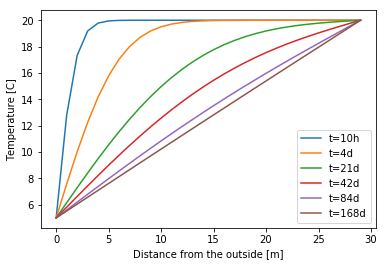

In [156]:
#Implicit solution

A_upper = -Fo*ones(nx-2)
A_mid = (1.+2.*Fo)*ones(nx-2)
A_lower = -Fo*ones(nx-2)
A_upper[0] = 0.
A_lower[-1] = 0.
A = vstack((A_upper, A_mid, A_lower))

for n in arange(ntimes-1):
    b = array(T[n,1:-1])
    b[0] += Fo*T_top
    b[-1] += Fo*T_bottom
    T[n+1,1:-1] = solve_banded((1,1), A, b)
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
    
    
#figure
figure()
for n in [10,100,500,1000,2000,4000]:
    plot(T[n,:])
legend(['t=10h','t=4d','t=21d','t=42d','t=84d','t=168d','analytical solution at t=100','analytical solution at t=4000'])
ylabel('Temperature [C]')
xlabel('Distance from the outside [m]')

It takes a long time for the wall to equilibrate!